In [2]:
import pandas as pd
import pathlib
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Set universal paths to enable easier navigation
root = pathlib.Path.cwd()
root_parent = root.parent

#Declare the data path
data = root_parent/"data"

In [6]:
#Load data
df = pd.read_csv(data/"advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
#Set the target variable
y = df["Sales"]

In [9]:
#Set the independent variables
X = df.drop(["Sales"],axis=1)

In [10]:
# Split the data into test and training samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Instantiate the linear regressiion model
regr = linear_model.LinearRegression()

In [12]:
# Train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [16]:
# Get a prediction based on the seperated test dataset 
y_pred=regr.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [17]:
# Obtain the coeficients relating to the independent variables
regr.coef_

array([0.05450927, 0.10094536, 0.00433665])

In [18]:
# Obtain the y intercept 
regr.intercept_

4.714126402214129

In [20]:
# Obtain the mean squared error between the test target data and the predicted data
mean_squared_error(y_test,y_pred)

2.9077569102710914

In [21]:
# Obtain the R2 to obtain the effect of the independent variables to the target
r2_score(y_test,y_pred)

0.9059011844150826

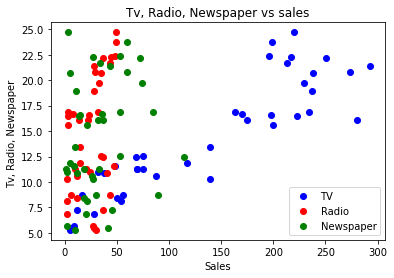

In [22]:
#Plot a sctter of the independt variable agains the target
plt.title("Tv, Radio, Newspaper vs sales",)
plt.xlabel("Sales")
plt.ylabel("Tv, Radio, Newspaper ")
plt.scatter(X_test["TV"],y_test, color="blue",label="TV")
plt.scatter(X_test["Radio"],y_test, color="red",label="Radio")
plt.scatter(X_test["Newspaper"],y_test, color="green",label="Newspaper")
# plt.subplots(2, 2, sharex='all', sharey='all')
plt.legend(loc="lower right")
# plt.plot(X_test, regr.predict(X_test),color='k')
